In [1]:
import matplotlib.pyplot as plt
import numpy as np

from utils import *

In [2]:
density_values, intgral_list, system_matrix_size = get_density_list()

CPU_median, CPU_min, CPU_max, CPU_std = load_cpu_stats_from_files("CPUMultiThread", density_values, "quadrule.txt")
GPU_median, GPU_min, GPU_max, GPU_std = load_cpu_stats_from_files("GPU", density_values, "sortGPU_determine_quadrule_types.txt")
GPU_median_2, GPU_min_2, GPU_max_2, GPU_std_2 = load_cpu_stats_from_files("GPU", density_values, "sortCPU_determine_quadrule_types.txt")


C:\Users\Ian\AppData\Local\Temp\ipykernel_16200\1222264714.py:21: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


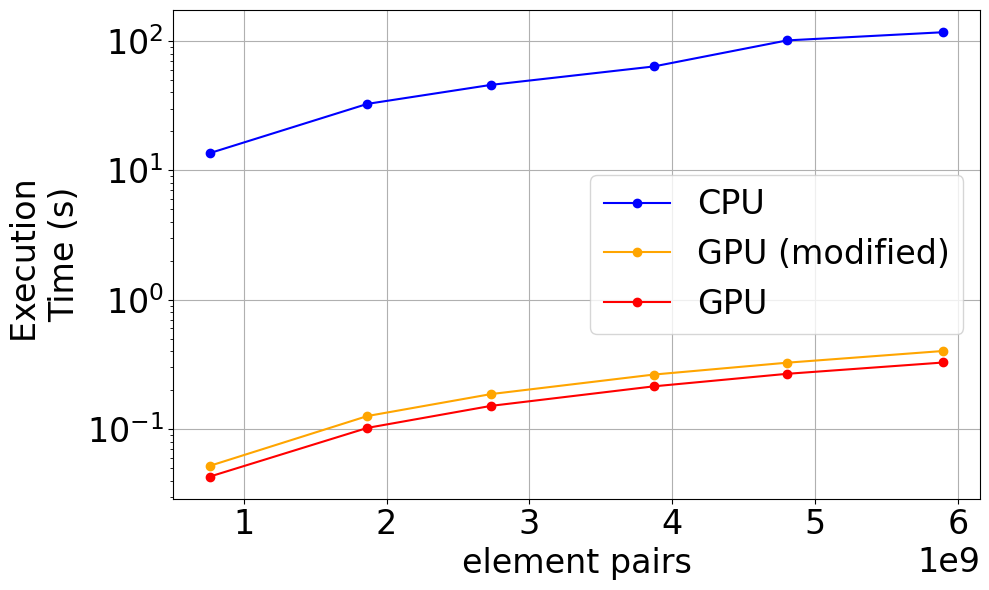

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(intgral_list, CPU_median , marker='o', label='CPU', color='blue')
ax.plot(intgral_list, GPU_median , marker='o', label='GPU (modified)', color='orange')
ax.plot(intgral_list, GPU_median_2 , marker='o', label='GPU', color='red')

ax.set_xlabel('element pairs', fontsize=24)
ax.set_ylabel('Execution \nTime (s)', fontsize=24)
#ax.set_title('Execution Time vs threads', fontsize=24)

ax.tick_params(axis='both', labelsize=24)
ax.set_yscale('log')


fig.canvas.draw()
offset_text = ax.xaxis.get_offset_text()
offset_text.set_size(24)  # Set font size of '1e9'

ax.legend(fontsize=24)

plt.ylim(bottom=0)
ax.grid(True)
plt.tight_layout()
plt.savefig("graphs/Quadrature_GPU_vs_CPU.svg", format='svg')
plt.show()

In [4]:
speedup = CPU_median / GPU_median
print(speedup)
print(intgral_list/10**(9))

speedup = CPU_median / GPU_median_2
print(speedup)
print(intgral_list/10**(9))

[261.02476963 258.40740324 245.14122068 240.35274637 309.42447814
 290.54814556]
[0.7644119  1.86624    2.73236198 3.86983526 4.80415334 5.89824   ]
[316.03697735 319.09326043 302.33963146 296.42006137 377.14818202
 356.70787537]
[0.7644119  1.86624    2.73236198 3.86983526 4.80415334 5.89824   ]


In [5]:
GPU_median_2 / GPU_median

array([0.8259311 , 0.8098178 , 0.81081405, 0.81085182, 0.82043211,
       0.81452686])

In [6]:
GPU_median / GPU_median_2 

array([1.21075474, 1.23484566, 1.23332841, 1.23327096, 1.2188699 ,
       1.2277066 ])

C:\Users\Ian\AppData\Local\Temp\ipykernel_16200\3399283924.py:31: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


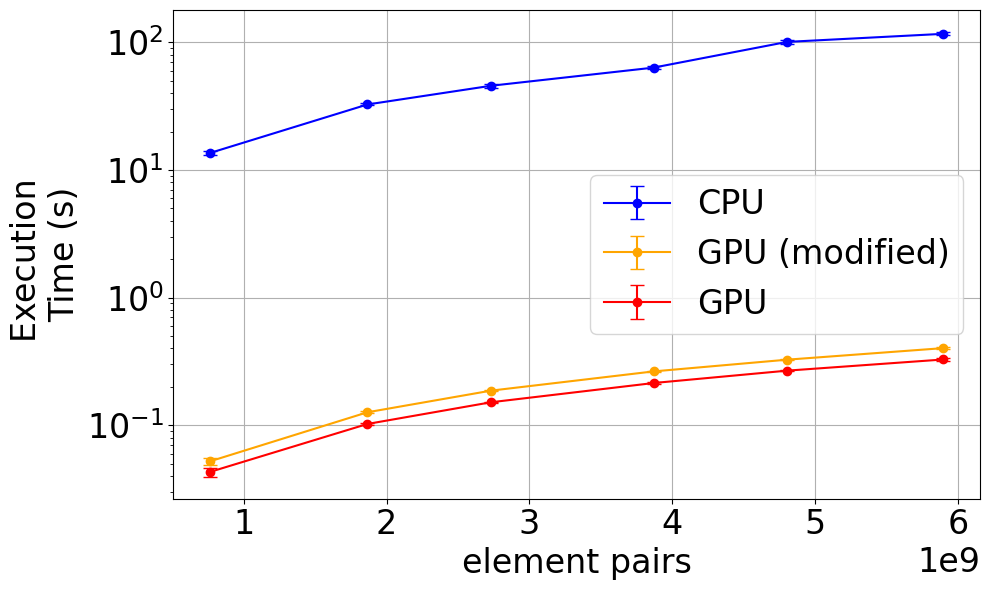

In [7]:

fig, ax = plt.subplots(figsize=(10, 6))

ax.errorbar(
    intgral_list, CPU_median, yerr=CPU_std,
    marker='o', label='CPU', color='blue', capsize=5, linestyle='-'
)

ax.errorbar(
    intgral_list, GPU_median, yerr=GPU_std,
    marker='o', label='GPU (modified)', color='orange', capsize=5, linestyle='-'
)

ax.errorbar(
    intgral_list, GPU_median_2, yerr=GPU_std,
    marker='o', label='GPU', color='red', capsize=5, linestyle='-'
)

ax.set_xlabel('element pairs', fontsize=24)
ax.set_ylabel('Execution \nTime (s)', fontsize=24)
# ax.set_title('Execution Time vs threads', fontsize=24)

ax.tick_params(axis='both', labelsize=24)
ax.set_yscale('log')

fig.canvas.draw()
offset_text = ax.xaxis.get_offset_text()
offset_text.set_size(24)

ax.legend(fontsize=24)

plt.ylim(bottom=0)
ax.grid(True)
plt.tight_layout()
plt.savefig("graphs/Quadrature_GPU_vs_CPU.svg", format='svg')
plt.show()